In [1]:
# 1. Libraries Import
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Seaborn style
sns.set(style="whitegrid")

In [2]:
df = pd.read_csv("titanic.csv")
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [3]:
# 1. Check for missing values
print("\n--- Missing Values ---")
print(df.isnull().sum())


--- Missing Values ---
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [4]:
# 2. Drop completely irrelevant columns (example: 'Cabin', 'Ticket' if not useful)
df.drop(columns=['Cabin', 'Ticket'], inplace=True, errors='ignore')

In [5]:
# 3. Handle missing values for 'Age'
# Fill with median because age is numeric and has outliers
df['Age'].fillna(df['Age'].median(), inplace=True)

In [6]:
# 4. Handle missing values for 'Embarked'
# Fill with most frequent value (mode)
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)

In [7]:
# 5. Check data types
print("\n--- Data Types ---")
print(df.dtypes)


--- Data Types ---
PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Fare           float64
Embarked        object
dtype: object


In [8]:
# Convert Survived, Pclass to category for analysis
df['Survived'] = df['Survived'].astype('category')
df['Pclass'] = df['Pclass'].astype('category')

In [9]:
# 6. Check duplicates
duplicates = df.duplicated().sum()
print(f"\nDuplicate rows found: {duplicates}")


Duplicate rows found: 0


In [10]:
# Remove duplicates if any
df.drop_duplicates(inplace=True)

In [11]:
# 7. Final check
print("\n--- Cleaned Data Info ---")
print(df.info())
print("\n--- First 5 Rows ---")
print(df.head())


--- Cleaned Data Info ---
<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   PassengerId  891 non-null    int64   
 1   Survived     891 non-null    category
 2   Pclass       891 non-null    category
 3   Name         891 non-null    object  
 4   Sex          891 non-null    object  
 5   Age          891 non-null    float64 
 6   SibSp        891 non-null    int64   
 7   Parch        891 non-null    int64   
 8   Fare         891 non-null    float64 
 9   Embarked     891 non-null    object  
dtypes: category(2), float64(2), int64(3), object(3)
memory usage: 64.6+ KB
None

--- First 5 Rows ---
   PassengerId Survived Pclass  \
0            1        0      3   
1            2        1      1   
2            3        1      3   
3            4        1      1   
4            5        0      3   

                                            

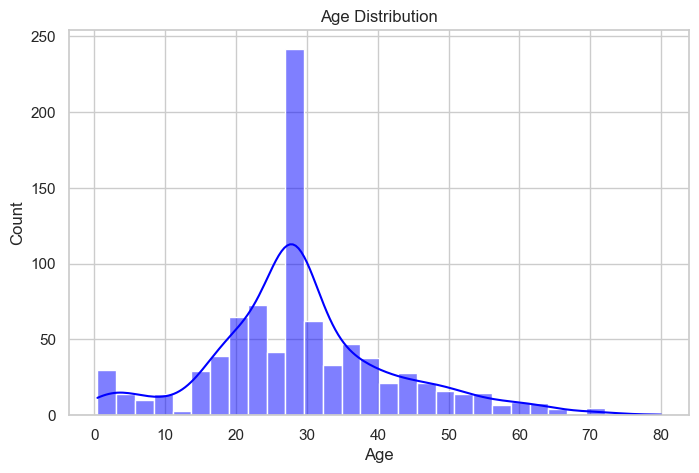

In [12]:
# 1. Age Distribution
plt.figure(figsize=(8,5))
sns.histplot(df['Age'], bins=30, kde=True, color="blue")
plt.title("Age Distribution")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()
# OBSERVATION: Most passengers were between 20-40 years old.

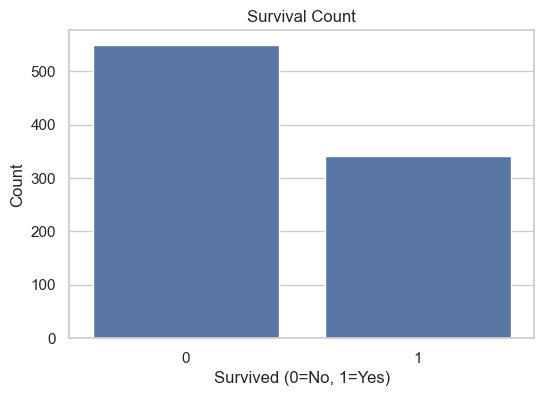

In [13]:
# 2. Survival Count
plt.figure(figsize=(6,4))
sns.countplot(x='Survived', data=df)
plt.title("Survival Count")
plt.xlabel("Survived (0=No, 1=Yes)")
plt.ylabel("Count")
plt.show()
# OBSERVATION: Majority did not survive.

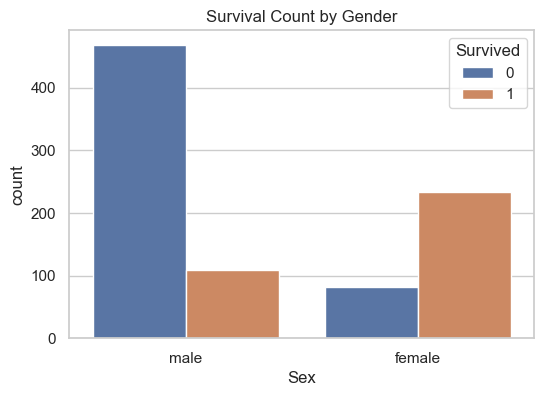

In [14]:
# 3. Survival by Gender
plt.figure(figsize=(6,4))
sns.countplot(x='Sex', hue='Survived', data=df)
plt.title("Survival Count by Gender")
plt.show()

# OBSERVATION: Female survival rate is much higher than male.

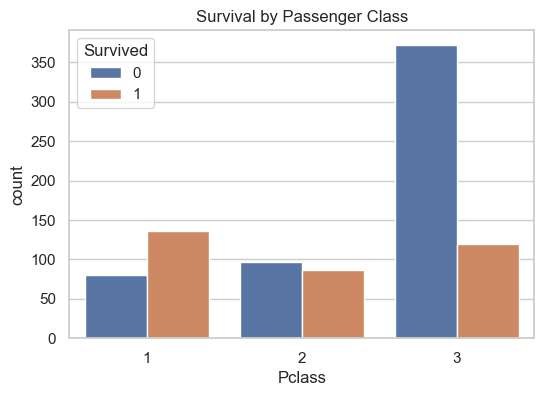

In [15]:
# 4. Survival by Passenger Class
plt.figure(figsize=(6,4))
sns.countplot(x='Pclass', hue='Survived', data=df)
plt.title("Survival by Passenger Class")
plt.show()

# OBSERVATION: 1st class passengers had highest survival rate.

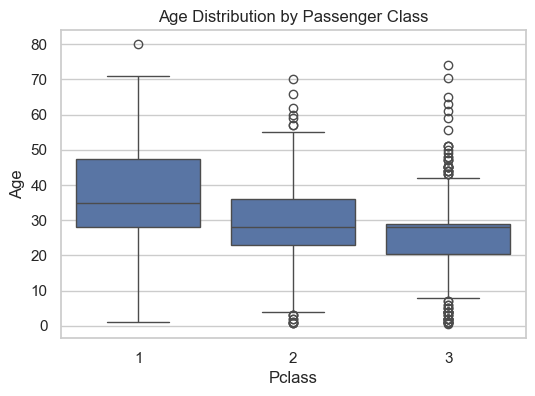

In [16]:
# 5. Boxplot - Age vs Passenger Class
plt.figure(figsize=(6,4))
sns.boxplot(x='Pclass', y='Age', data=df)
plt.title("Age Distribution by Passenger Class")
plt.show()

# OBSERVATION: Median age is highest in 1st class.

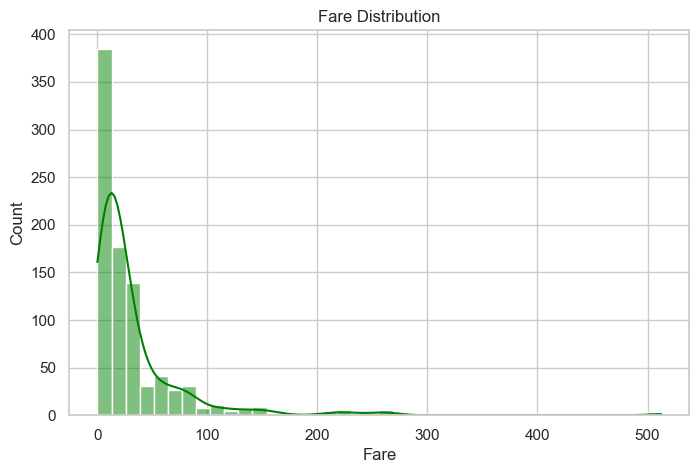

In [17]:
# 6. Fare Distribution
plt.figure(figsize=(8,5))
sns.histplot(df['Fare'], bins=40, kde=True, color="green")
plt.title("Fare Distribution")
plt.show()

# OBSERVATION: Most fares were low, with few high-paying passengers.

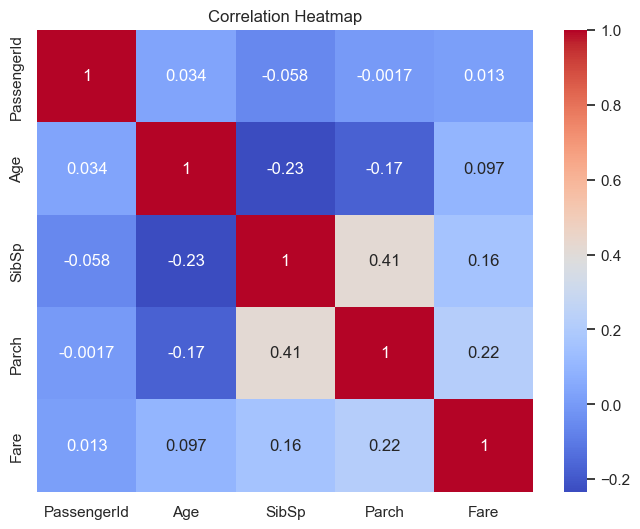

In [18]:
# Select only numeric columns manually
numeric_df = df.select_dtypes(include=['number'])
plt.figure(figsize=(8,6))
sns.heatmap(numeric_df.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

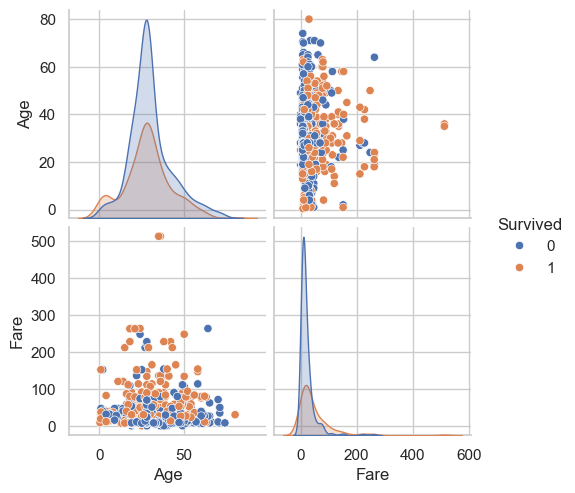

In [19]:
# 8. Pairplot
sns.pairplot(df[['Survived','Age','Fare','Pclass']], hue='Survived')
plt.show()
# OBSERVATION: Survivors generally paid higher fares.

Summary of Findings:
1. Most passengers were between 20–40 years old.
2. Females had much higher survival rate than males.
3. 1st class passengers survived more compared to others.
4. Higher fare was linked to higher survival.
5. Majority of passengers did not survive.